## Data import

In [4]:
import pandas as pd
import numpy as np
from numpy import nan as NA
import requests as rq
import json
import os
import plotly.graph_objects as go
import seaborn as sns
import psycopg2
import matplotlib.pyplot as plt

# Standard file path for all files
home_directory = os.path.expanduser('~') # Retrieve user's home directory
file_path = os.path.join(home_directory,'Downloads') # Create file path

# Create function to import *.csv file and handle exceptions
def import_csv_file(file_path):
    try:
        if not os.path.exists(file_path): # Check if the file exists
            raise FileNotFoundError(f"The file {file_path} does not exist.")
        df = pd.read_csv(file_path) # Read the *.csv file into a Pandas DataFrame
        return df
    except FileNotFoundError as e:
        print(f"Error: {e}")
    except pd.errors.ParserError:
        print(f"Error: Unable to parse the CSV file. Make sure it is a valid CSV file.")
    except Exception as e:
        print(f'Error: An unexpected error occurred. {str(e)}')

# 1.4. Population by county dataset
file3 = 'data_103802.csv' # Input file name
population_file_name = 'population_dataset.csv' # Output file name
population_csv_file = os.path.join(file_path,file3) # Join path with file name
file_path = population_csv_file
population = import_csv_file(file_path) # Import the *.csv file of the fourth dataset
if population is not None: 
    print("Population by county dataset sample:")
    print(population.head()) # Display the first few rows of the DataFrames if not null
    print()
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

Population by county dataset sample:
   StateFIPS       State  Year       Value  Data Comment  Unnamed: 5
0          1     Alabama  2021   5,039,877           NaN         NaN
1          2      Alaska  2021     732,673           NaN         NaN
2          4     Arizona  2021   7,276,316           NaN         NaN
3          5    Arkansas  2021   3,025,891           NaN         NaN
4          6  California  2021  39,237,836           NaN         NaN



## Data quality and visualisations

Population by county dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StateFIPS     51 non-null     int64  
 1   State         51 non-null     object 
 2   Year          51 non-null     int64  
 3   Value         51 non-null     object 
 4   Data Comment  0 non-null      float64
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB
None

Population by county dataset overview:
Missing values:
0
Non-numeric values:
   StateFIPS       State  Year     Value  Data Comment  Unnamed: 5
0          1     Alabama  2021   5039877           NaN         NaN
1          2      Alaska  2021    732673           NaN         NaN
2          4     Arizona  2021   7276316           NaN         NaN
3          5    Arkansas  2021   3025891           NaN         NaN
4          6  California  2021  392

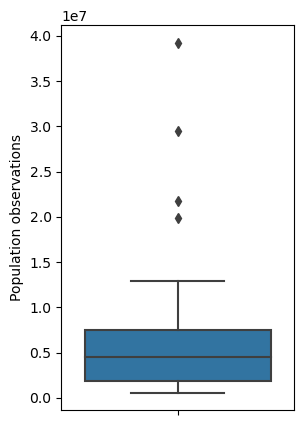

In [5]:
# Set visuals standard
colors = ['lightslategray',] * 10
colors[0] = 'crimson'

# Data info
if population is not None: 
    print("Population by county dataset overview:")
    print(population.info()) # Describe the dataset
    print()

# Pre-processing
population['Value'] = population['Value'].astype(str) # Convert the 'Value' column to string
population['Value'] = pd.to_numeric(population['Value'].str.replace('[^\d]', '', regex=True), errors='coerce') # Replace non-numeric characters and convert to numeric
print("\033[1mPopulation by county dataset overview:\033[0m")
population_null = population['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(population_null)
population_NaN = pd.to_numeric(population['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(population.head())
print(population_NaN)
plt.figure(figsize=(3, 5))  # Set boxplot size 
sns.boxplot(y=population['Value']) # Create a boxplot to check for outliers
plt.ylabel('Population observations') # Set Y axis label
plt.show()
print()